# Velocity

In [1]:
from importlib import reload
import numpy as np
from cugn import arcteryx

import seaborn as sns

# Load

In [2]:
adict = arcteryx.load_ctd()

# Cut on time

In [3]:
reload(arcteryx)
dt, idx = arcteryx.cut_on_time(12., adict=adict)

# Separation (and r)

In [14]:
reload(arcteryx)
rdict = arcteryx.calc_r(adict, idx)

# Velocity at a given depth

In [9]:
iz = 0
# Unpack
u0 = adict['udop'][iz][idx[0]]
u1 = adict['udop'][iz][idx[1]]
v0 = adict['vdop'][iz][idx[0]]
v1 = adict['vdop'][iz][idx[1]]

In [10]:
umag = np.sqrt((u1-u0)**2 + (v1-v0)**2)

## Examine

<Axes: ylabel='Count'>

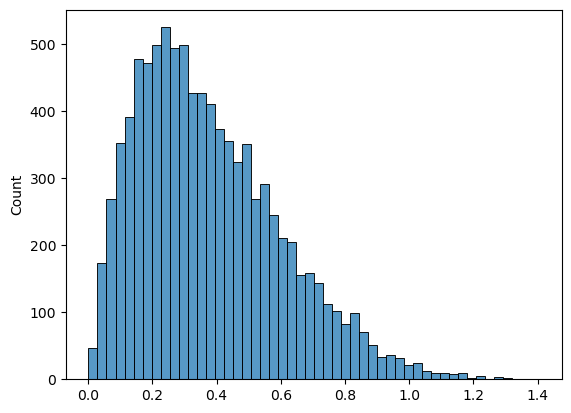

In [11]:
sns.histplot(umag, bins=50)

# $\delta u_L$

In [13]:
du = u1-u0
dv = v1-v0

In [17]:
duL = rdict['dN']*du + rdict['oN']*dv

<Axes: ylabel='Count'>

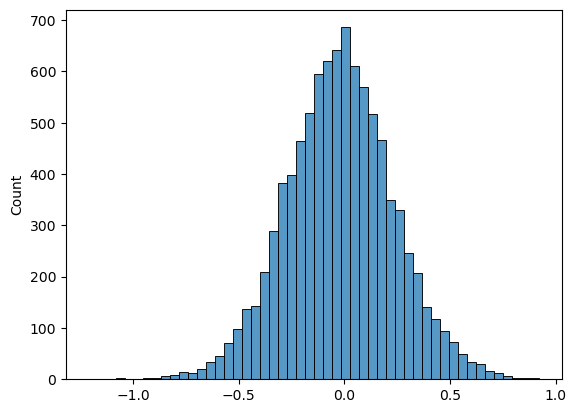

In [18]:
sns.histplot(duL, bins=50)

----

# As a method

In [20]:
reload(arcteryx)
udict = arcteryx.calc_du(adict, rdict, idx)

<Axes: ylabel='Count'>

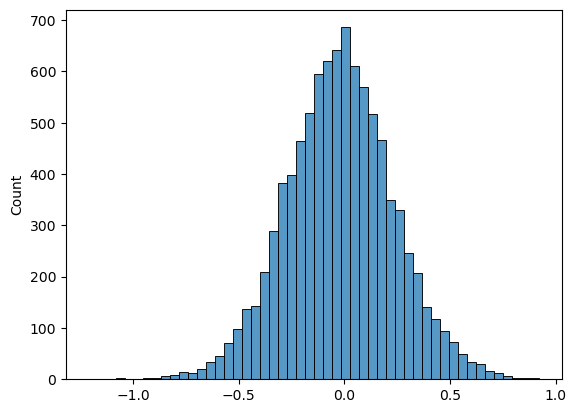

In [22]:
sns.histplot(udict['duL'], bins=50)